In [3]:
import numpy as np
help(np.linspace)

Help on function linspace in module numpy.core.function_base:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    Parameters
    ----------
    start : scalar
        The starting value of the sequence.
    stop : scalar
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that `stop` is excluded.  Note that the step
        size changes when `endpoint` is False.
    num : int, optional
        Number of samples to generate. Default is 50. Must be non-negative.
    endpoint : bool, optional
        If True, `stop` is the last sample. Otherwise, it is not included.
        Default is True.
    retstep : bo

## Задание по numpy
1. Напишите свой аналог np.linspace с использованием цикла и с использованием list comprehension. Сравните все три варианта по производительности
1. Сравните по производительности основные операции с массивами (array) numpy и с list


In [103]:
def linsp_loop(start, stop, num=50):
    arr = [ ]
    if num == 1: return np.array([float(start)])
    step = float(stop - start) / (num-1)
    for i in range(num):
        arr.append(start + i * step)
    return np.array(arr)

In [118]:
def linsp_listcomp(start, stop,  num=50):
    step = float(stop - start) / (num-1)
    return np.array([start + i * step for i in range(num)])

In [119]:
print np.linspace(1,50,30)
print linsp_loop(1,50,30)
print linsp_listcomp(1,50,30)

[  1.           2.68965517   4.37931034   6.06896552   7.75862069
   9.44827586  11.13793103  12.82758621  14.51724138  16.20689655
  17.89655172  19.5862069   21.27586207  22.96551724  24.65517241
  26.34482759  28.03448276  29.72413793  31.4137931   33.10344828
  34.79310345  36.48275862  38.17241379  39.86206897  41.55172414
  43.24137931  44.93103448  46.62068966  48.31034483  50.        ]
[  1.           2.68965517   4.37931034   6.06896552   7.75862069
   9.44827586  11.13793103  12.82758621  14.51724138  16.20689655
  17.89655172  19.5862069   21.27586207  22.96551724  24.65517241
  26.34482759  28.03448276  29.72413793  31.4137931   33.10344828
  34.79310345  36.48275862  38.17241379  39.86206897  41.55172414
  43.24137931  44.93103448  46.62068966  48.31034483  50.        ]
[  1.           2.68965517   4.37931034   6.06896552   7.75862069
   9.44827586  11.13793103  12.82758621  14.51724138  16.20689655
  17.89655172  19.5862069   21.27586207  22.96551724  24.65517241
  26.344

In [129]:
%%timeit
a = np.linspace(1, 10000, 1000)

10000 loops, best of 3: 28.4 µs per loop


In [130]:
%%timeit
a = linsp_loop(1, 10000, 1000)

1000 loops, best of 3: 576 µs per loop


In [131]:
%%timeit
a = linsp_listcomp(1, 10000, 1000)

1000 loops, best of 3: 420 µs per loop


## Задание по scipy
Попробуйте поменять метод оптимизации в примере решения оптимизационной задачи выше, и подобрать метод с наименьшим количеством вычислений функции. Начальное приближение оставьте тем же.

In [132]:
from scipy import optimize
help(optimize.minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    In general, the optimization problems are of the form::
    
        minimize f(x) subject to
    
        g_i(x) >= 0,  i = 1,...,m
        h_j(x)  = 0,  j = 1,...,p
    
    where x is a vector of one or more variables.
    ``g_i(x)`` are the inequality constraints.
    ``h_j(x)`` are the equality constrains.
    
    Optionally, the lower and upper bounds for each element in x can also be
    specified using the `bounds` argument.
    
    Parameters
    ----------
    fun : callable
        Objective function.
    x0 : ndarray
        Initial guess.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (Jacobian, Hessian).
    method : str or callable, op

In [138]:
def f(x):
    return (x[0] - 3.2) ** 2 + (x[1] - 0.1) ** 2 + 3

print f([3.2, 0.1])

3.0


In [151]:
methods = np.array(['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'L-BFGS-B', 'TNC', 'COBYLA', 'SLSQP'])
array = []
for m in methods:
    array.append(optimize.minimize(f, [5, 5], method=m).nfev)
    
array = np.array(array)
array

array([87, 92, 20, 16,  9, 22, 47,  9])

Самые быстрые L-BFGS-B и SLSQP, 9 итераций

## Задание по Matplotlib
1. Добавьте подписи к осям и легенду к примеру выше (см. документацию)
1. Постройте график с 5 разными элементарными функциями и сделайте легенду к графику в TeXe
1. Сохраните рисунок в файл строчкой кода на Python

In [152]:
from matplotlib import pylab as plt
help(plt)

Help on module matplotlib.pylab in matplotlib:

NAME
    matplotlib.pylab

FILE
    c:\users\vitaly\anaconda2\lib\site-packages\matplotlib\pylab.py

DESCRIPTION
    This is a procedural interface to the matplotlib object-oriented
    plotting library.
    
    The following plotting commands are provided; the majority have
    MATLAB |reg| [*]_ analogs and similar arguments.
    
    .. |reg| unicode:: 0xAE
    
    _Plotting commands
      acorr     - plot the autocorrelation function
      annotate  - annotate something in the figure
      arrow     - add an arrow to the axes
      axes      - Create a new axes
      axhline   - draw a horizontal line across axes
      axvline   - draw a vertical line across axes
      axhspan   - draw a horizontal bar across axes
      axvspan   - draw a vertical bar across axes
      axis      - Set or return the current axis limits
      autoscale - turn axis autoscaling on or off, and apply it
      bar       - make a bar chart
      barh      - 

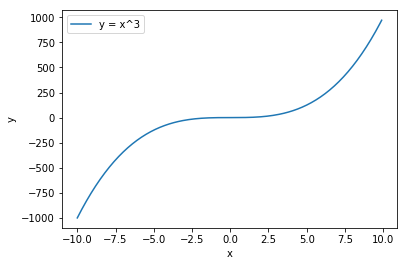

In [155]:
x = np.arange(-10, 10, 0.1)
y = x ** 3

plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y, label='y = x^3')
plt.legend()
plt.show()

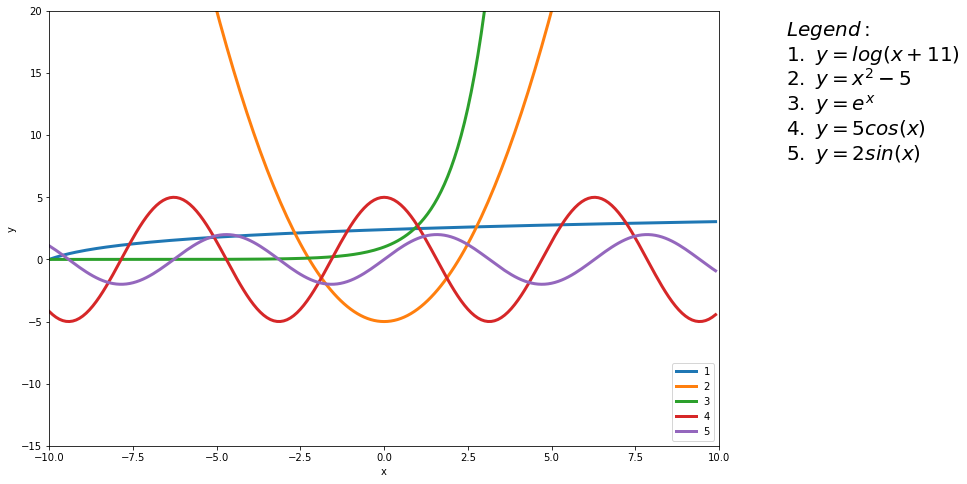

In [175]:
x = np.arange(-10, 10, 0.1)
plt.figure(figsize=(12, 8))
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-10, 10)
plt.ylim(-15, 20)

plt.text(12, 18, r'$Legend:$', fontsize=20)
plt.text(12, 16, r'$1.\ y = log(x+11)$', fontsize=20)
plt.text(12, 14, r'$2.\ y = x^2 - 5$', fontsize=20)
plt.text(12, 12, r'$3.\ y = e^x$', fontsize=20)
plt.text(12, 10, r'$4.\ y = 5cos(x)$', fontsize=20)
plt.text(12, 8, r'$5.\ y = 2sin(x)$', fontsize=20)

plt.plot(x, np.log(x+11), label='1', linewidth=3)
plt.plot(x, x ** 2 - 5, label='2', linewidth=3)
plt.plot(x, np.e ** x, label='3', linewidth=3)
plt.plot(x, 5 * np.cos(x), label='4', linewidth=3)
plt.plot(x, 2 * np.sin(x), label='5', linewidth=3)
plt.legend(loc=4)

plt.savefig('image.jpg', format='jpg')
plt.show()

## Задание на Numpy+Matplotlib

1. Сгенерируйте массив из 500 точек на плоскости с координатами $(x, y)$, такими, что $x$ меняется от -1 до 1, а $y = 2x - 1 + \varepsilon$, где $\varepsilon \sim \mathcal{N}(0, 0.1)$
2. Сгенерируйте массив из 100 точек на плоскости с координатами $(x, y)$, такими, что $x$ меняется от -1 до 1, а $y = 1 + \varepsilon$, где $\varepsilon \sim \mathcal{N}(0, 0.1)$
3. Изобразите первый и второй массив точек на плоскости (используя два разных цвета), а также график функии $f(x) = 2x - 1$ (используя какой-нибудь третий цвет)

Сделано в linear_regression.ipynb